# Basic `secdetect` example
---

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
plt.set_cmap('magma');
%matplotlib inline

from skimage.measure import regionprops

import secdetect

In [16]:
# Load random overview image from `secdetect.data`
imin = secdetect.data.load(12)
# Detect sections
imout = secdetect.detect_sections(imin)

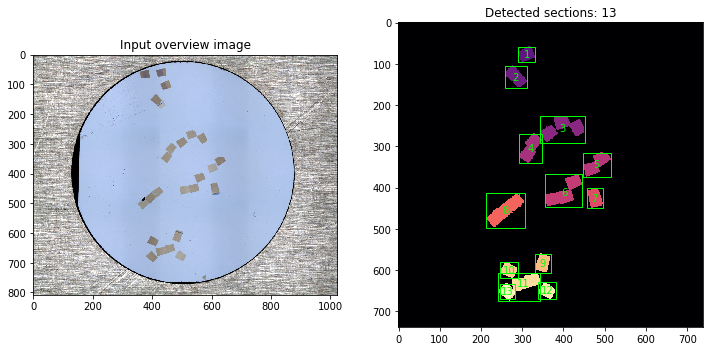

In [17]:
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))
ax1.imshow(imin);
ax2.imshow(imout);

# Show section bounding boxes
for i, region in enumerate(regionprops(imout)):
    y0, x0, y1, x1 = region.bbox
    r = Rectangle((x0, y0), x1-x0, y1-y0, fill=False,
                  edgecolor='#00FF00', lw=1)
    ax2.add_patch(r)
    ax2.text(x=region.centroid[1], y=region.centroid[0], s=i+1,
             color='#00FF00', ha='center', va='center')
    
# Figure aesthetics
N = len(regionprops(imout))
ax1.set_title('Input overview image');
ax2.set_title(f'Detected sections: {N}');